# Predictive Analytics for Trending Videos


The focus of this assessment is to explore what makes videos popular on various platforms, e.g., Netflix and YouTube. This notebook uses YouTube data for identification of patterns and predicting the number of views based on attributes in data

## Required Libraries

In [169]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.express as px
from matplotlib import cm
import seaborn as sns
import matplotlib
from datetime import datetime
import pandas as pd
import numpy as np
import json, glob, re, os
import random
pd.options.mode.chained_assignment = None

Import your dataset using the following cells for the Youtube videos

# Section 1. : Machine Learning with Sklearn

## 1.1.1 Data loading and Preprocessing

The dataset consists of a daily record of the top trending YouTube videos.

To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions, e.g., number of views, shares, comments and likes. "Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously viral “[Gangnam Style](https://www.youtube.com/watch?v=9bZkp7q19f0)”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for.

This dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for numerous countries, with up to 200 listed trending videos per day.

Each region’s data is in a separate file. Data includes:

*   Video Title
*   Channel title
*   Publish time
*   Tags
*   Views
*   Likes
*   Dislikes
*   Description
*   Comment count

The data also includes a category\_id field, which varies between regions. To retrieve the categories for a specific video, find it in the associated JSON. One such file is included for each of the five regions in the dataset.

For more information on specific columns in the dataset refer to the column metadata.



#### 1.1.1.1: Combining Multiple CSV's.

There are multiple csv files in the dataset, each corresponding to a specific country. As a first step, we need to read them and combine these csv files into a single dataframe. Use 'video_id' as your index.

While combining them, there is a need to create a column for "country" and fill it in the final dataframe. The country name can be extracted using the filename itself.

dataframe name: "combined_data".

In [89]:
files = [i for i in glob.glob("/Users/goldyrana/work/ATU/Sem1/predictive/t_project_2/youtube_data/*.csv".format('csv'))]
files
sorted(files)

# Task: Merge all dataframes to single dataframe "combined_data" and add a 'country' column.
all_dataframes = list()
for csv in files:
  frame = pd.read_csv(csv,index_col=0)
  frame['country'] = os.path.basename(csv)
  all_dataframes.append(frame)

combined_data = pd.concat(all_dataframes)
combined_data['country']=combined_data['country'].map(lambda x: x.lstrip('+-').rstrip('videos.csv'))
combined_data

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,
kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,IN
zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",IN
10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,IN
N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,IN
kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,IN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,US
1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,US
D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,US


In [90]:
print(f"Columns in Combined data are as follow: f{combined_data.columns}")

Columns in Combined data are as follow: fIndex(['trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country'],
      dtype='object')


#### 1.1.1.2: Map category Id's to categories


In [91]:
combined_data['category_id'] = combined_data['category_id'].astype(str)
js_files = [i for i in glob.glob('/Users/goldyrana/work/ATU/Sem1/predictive/t_project_2/youtube_data/*.json')]
sorted(js_files)

id_to_category = {}
for x in js_files:
  js = pd.read_json(x)
  for category in js ["items"]:
        id_to_category[category["id"]] = category["snippet"]["title"]
combined_data["category"] = combined_data["category_id"].map(id_to_category)
#

combined_data.head(2)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category
video_id,,,,,,,,,,,,,,,,,
kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,IN,Film & Animation
zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",IN,News & Politics


In [92]:
# For better understanding of data in json file
js.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


#### 1.1.1.3: Fix datetime format and remove rows with NA's (1 pt)

The 'publish_time' and 'trending_date' features are not in a unix datetime format, so using pandas to_datetime() to convert it into the right format.

After that is done removing all the rows which have NA's in them.

In [93]:
combined_data.info()
combined_data['trending_date'] = pd.to_datetime(combined_data["trending_date"],format ="%y.%d.%m")
combined_data['publish_time'] = pd.to_datetime(combined_data["publish_time"],format = "%Y-%m-%dT%H:%M:%S.%fZ")

combined_data = combined_data.dropna()
combined_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 159906 entries, kzwfHumJyYc to ooyjaVdt-jA
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   trending_date           159906 non-null  object
 1   title                   159906 non-null  object
 2   channel_title           159906 non-null  object
 3   category_id             159906 non-null  object
 4   publish_time            159906 non-null  object
 5   tags                    159906 non-null  object
 6   views                   159906 non-null  int64 
 7   likes                   159906 non-null  int64 
 8   dislikes                159906 non-null  int64 
 9   comment_count           159906 non-null  int64 
 10  thumbnail_link          159906 non-null  object
 11  comments_disabled       159906 non-null  bool  
 12  ratings_disabled        159906 non-null  bool  
 13  video_error_or_removed  159906 non-null  bool  
 14  description             15

In [95]:
# print
print('validate_na',(combined_data.shape))

validate_na (154567, 17)


## 1.2 Exploratory Data Analysis & Feature Engineering


**Exploratory Data Analysis:**
EDA aims to analyze data sets by summarizing its key characteristics assisted by visualizations. EDA communicates insights beyond formal modeling/hypothesis testing with or without statistical model.

**Feature Engineering:**
The primary object of feature engineering is to extract features using domain knowledge. It aims to extract features from raw data using various data mining approaches.

These features are fed to various machine learning classifiers. These features are also called as covariates, predicators, or simply a new column in data frame.

##### 1.2.1: Calculating Mean, standard deviation, min and max.

In this section, statistics for numberical features is measured and then store into lists i.e.,  [views, likes, dislikes, comment_count].

means = [views_mean, likes_mean, dislikes_mean, comment_count_mean] and similarly for mins, maxs and stds.

In [96]:
combined_data.describe()

,trending_date,publish_time,views,likes,dislikes,comment_count
count,154567,154567,1.545670e+05,1.545670e+05,1.545670e+05,1.545670e+05
mean,2018-02-27 02:23:21.598012416,2018-02-21 11:58:53.405118976,1.281578e+06,4.096105e+04,2.056138e+03,4.606594e+03
min,2017-11-14 00:00:00,2006-07-23 08:24:11,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2018-01-03 00:00:00,2018-01-01 02:28:48.500000,9.574900e+04,1.321000e+03,8.100000e+01,1.720000e+02
50%,2018-02-26 00:00:00,2018-02-23 17:00:02,3.134280e+05,6.336000e+03,2.980000e+02,7.650000e+02
75%,2018-04-24 00:00:00,2018-04-21 06:22:47,9.473390e+05,2.594050e+04,1.024000e+03,2.726000e+03
max,2018-06-14 00:00:00,2018-06-14 02:25:38,2.252119e+08,5.613827e+06,1.643059e+06,1.228655e+06
std,NaN,NaN,4.605292e+06,1.521490e+05,1.825854e+04,2.327823e+04


In [97]:
combined_data[combined_data["dislikes"] == 1.643059e+06	]

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category
video_id,,,,,,,,,,,,,,,,,
FlsCjmMhFmw,2017-12-14,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06 17:58:51,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",US,Entertainment


In [98]:

maxs = combined_data.describe().iloc[7].values.tolist()
mins = combined_data.describe().iloc[3].values.tolist()
stds = combined_data.describe().iloc[2].values.tolist()
means = combined_data.describe().iloc[1].values.tolist()



In [99]:
# print here
print('check_min_max_mean_std',([maxs, mins, stds, means]))


check_min_max_mean_std [[nan, nan, 4605292.478385794, 152148.95485475138, 18258.541379660703, 23278.225620617904], [Timestamp('2018-01-03 00:00:00'), Timestamp('2018-01-01 02:28:48.500000'), 95749.0, 1321.0, 81.0, 172.0], [Timestamp('2017-11-14 00:00:00'), Timestamp('2006-07-23 08:24:11'), 223.0, 0.0, 0.0, 0.0], [Timestamp('2018-02-27 02:23:21.598012416'), Timestamp('2018-02-21 11:58:53.405118976'), 1281578.03423758, 40961.05191276275, 2056.138490104615, 4606.593742519425]]


#### 1.2.2: Rescaling the features

From the above section, it is clear that the numerical values range is really high.  we can use rescaling to avoid numerical instability problems. We can rescale likes, views, dislikes, and comment_count using log scale (base e). Let us store rescaled features in dataframe as likes_log, views_log, dislikes_log and comment_log.

NOTE- log 0 is not defined, therefore, 1 is added to each value prior to taking the log.

In [100]:
combined_data['likes_log'] = np.log(1 + combined_data['likes'])
combined_data['views_log'] = np.log(1 + combined_data['views'])
combined_data['dislikes_log'] = np.log(1 + combined_data['dislikes'])
combined_data['comment_log'] = np.log(1 + combined_data['comment_count'])

In [101]:
# Print results
print('check_feature_rescaling',([np.mean(combined_data['likes_log']),np.mean(combined_data['views_log']),np.mean(combined_data['dislikes_log']),
                                         np.mean(combined_data['comment_log'])]))

check_feature_rescaling [8.571590187188637, 12.552679805013259, 5.614484952080614, 6.424543615107988]


#### 1.2.3: Plotting the distribution (2 pt)

Plotting the distribution for the newly created log features.

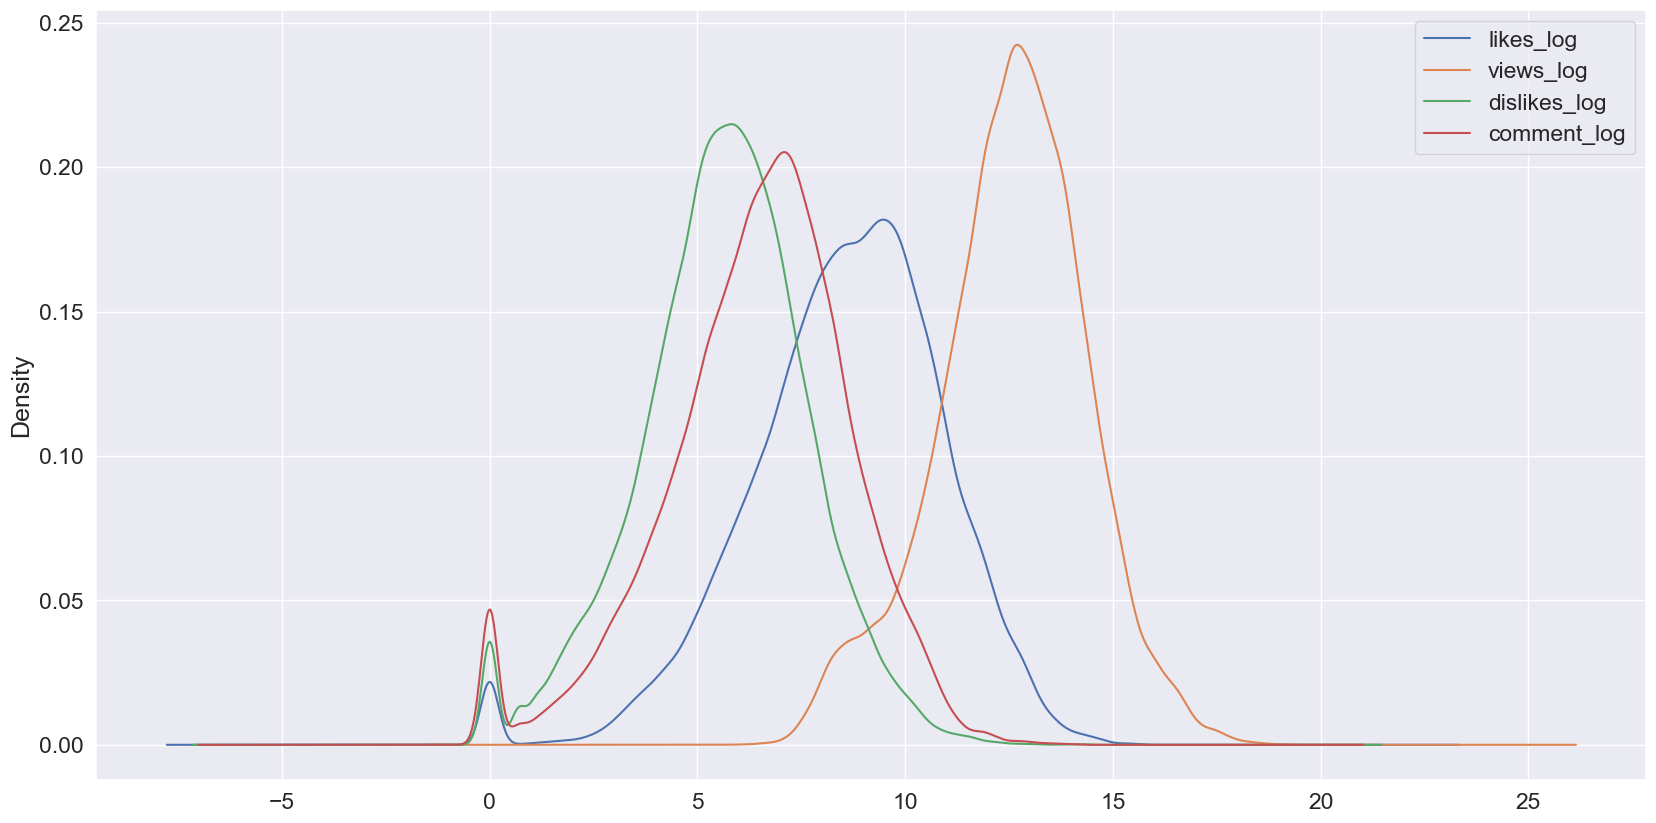

In [102]:
log_df=combined_data[['likes_log','views_log','dislikes_log','comment_log']]
log_df.plot.kde(figsize=(20,10))
plt.show()

#### 1.2.4: Comparing views, likes, dislikes against categories

Gaining isights into data using various catergories, views, likes and dislikes.

1.) How many videos are there for each category?

2.) What is the distribution of views against categories? (Use boxplot and views on log scale)

3.) What is the distribution of dislikes against categories? (Use boxplot and dislikes on log scale)


In [103]:
##1-Total videos for each category:
by_category = (combined_data.groupby(["category"]).size().sort_values(ascending = False)/len(combined_data)) * 100
print('Total videos for each category: \n', by_category)

Total videos for each category: 
 category
Entertainment            31.678172
Music                    11.527687
Comedy                    9.568666
News & Politics           9.518849
People & Blogs            9.027800
Sports                    6.138438
Howto & Style             6.022631
Film & Animation          5.094231
Science & Technology      3.135210
Education                 2.939825
Gaming                    2.323911
Pets & Animals            0.984686
Autos & Vehicles          0.909638
Travel & Events           0.575155
Shows                     0.313780
Nonprofits & Activism     0.218675
Movies                    0.021350
Trailers                  0.001294
dtype: float64


In [104]:
import plotly.express as px
df_cat=pd.DataFrame(by_category)
df_cat['category'] = df_cat.index
df_cat.columns=['a','b']
fig4 = px.bar(df_cat, x="b", y="a",color='a',labels={'b':'Category','a':'Videos/Category'}, height=400)
fig4.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)',})

(Text(0.5, 1.0, 'Distribution of Views against Categories'),
 Text(0.5, 0, 'Video Category'),
 Text(0, 0.5, 'View Logs'))

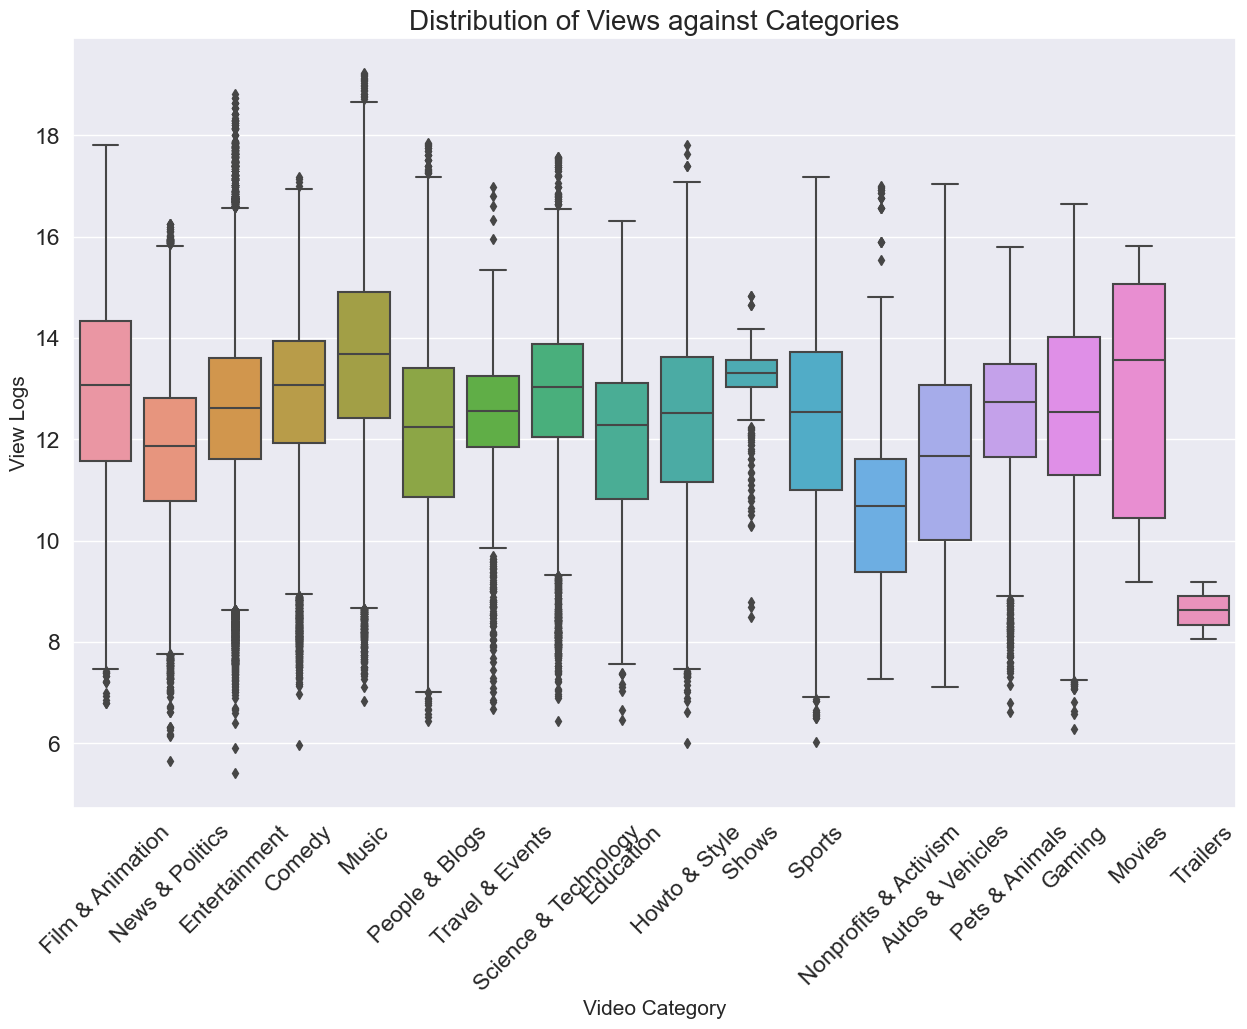

In [105]:
##2-Distribution of views against categories, using boxplot and views on log scale
fig, ax = pyplot.subplots(figsize=(15,10))
sns.boxplot(x="category", y="views_log", data=combined_data[['category','views_log']]),plt.xticks(rotation = 45)
ax.set_title("Distribution of Views against Categories",fontsize=20),ax.set_xlabel('Video Category',fontsize=15),ax.set_ylabel(ylabel='View Logs',fontsize=15)


(Text(0.5, 1.0, 'Distribution of Dislikes against Categories'),
 Text(0.5, 0, 'Video Category'),
 Text(0, 0.5, 'Dislike Logs'))

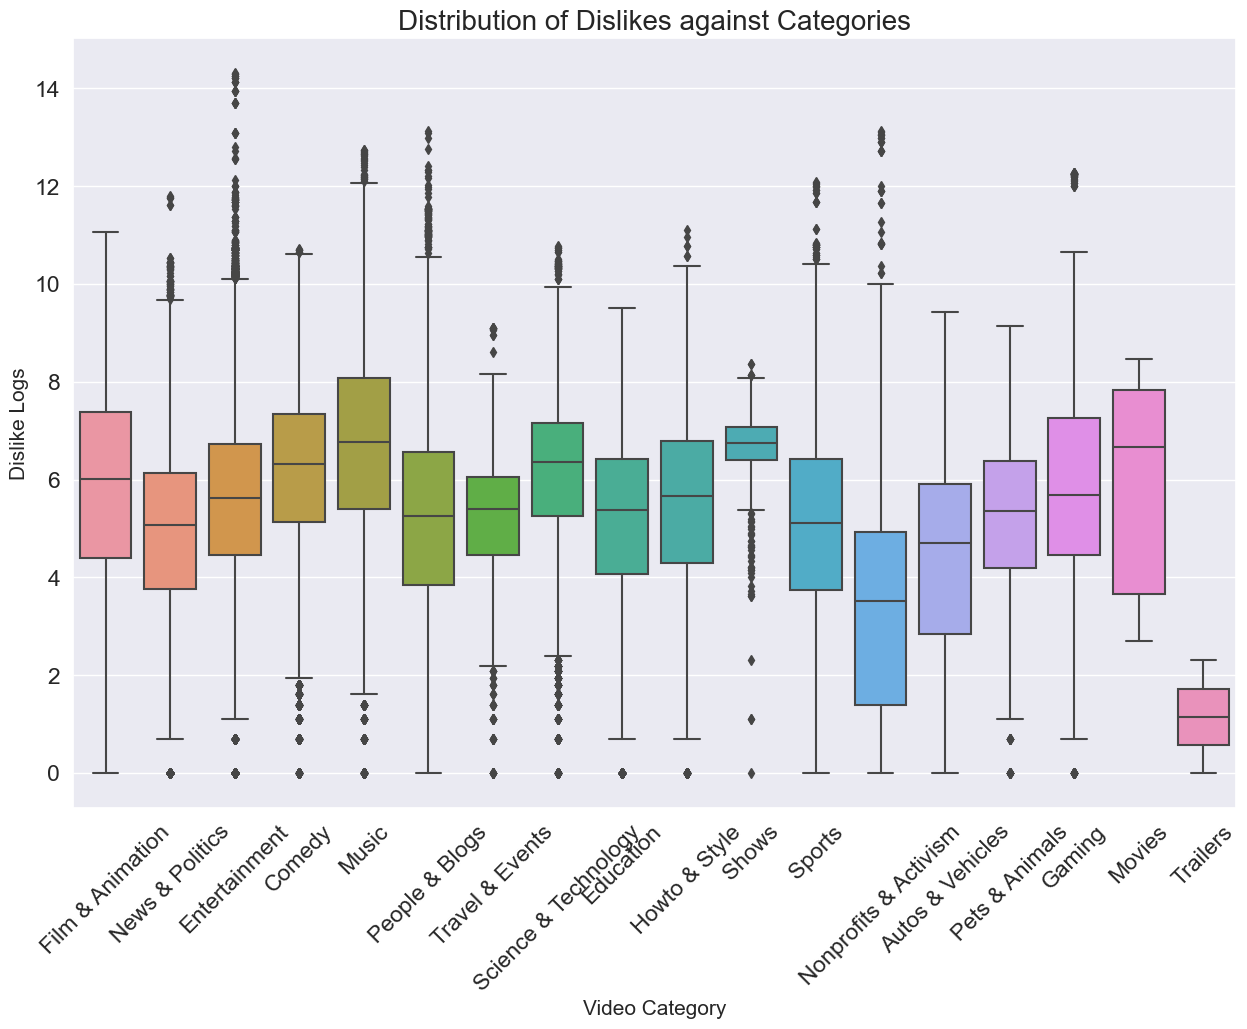

In [106]:
##3-Distribution of dislikes against categories, Using boxplot and dislikes on log scale
fig, ax = pyplot.subplots(figsize=(15,10))
sns.boxplot(x="category", y="dislikes_log", data=combined_data[['category','dislikes_log']]),plt.xticks(rotation = 45)
ax.set_title("Distribution of Dislikes against Categories",fontsize=20),ax.set_xlabel('Video Category',fontsize=15),ax.set_ylabel(ylabel='Dislike Logs',fontsize=15)


**How long does a video trend in a country?**

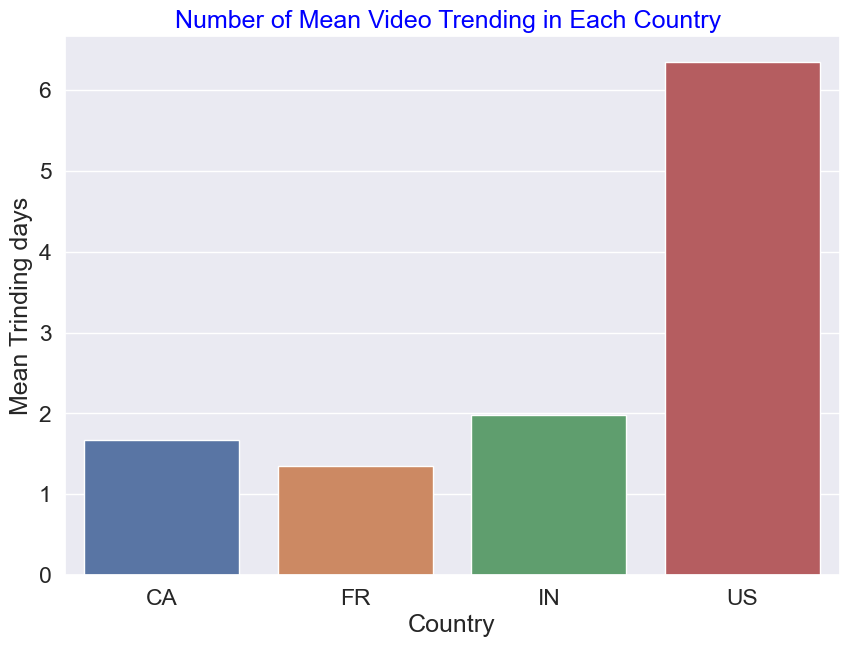

In [107]:
df=combined_data.drop_duplicates()
df1=df.groupby(['title','country']).size().reset_index(name='count')
trending=df1.groupby('country')['count'].mean().to_frame().reset_index().rename(columns={"country": "Country", "count": "Mean Trinding days"})

fig, ax = pyplot.subplots(figsize=(10, 7)),sns.set(font_scale=1.5)
sns.barplot(x="Country", y="Mean Trinding days", data=trending,ax=ax),plt.title('Number of Mean Video Trending in Each Country ',color='Blue')
plt.show()

**What are some videos which got popular because they were disliked?**

In [108]:
df2=df.groupby(['title','dislikes','likes']).size().reset_index(name='Trend_Days')
trending_dislikes=df2.loc[(df2['dislikes'] > df2['likes']) & (df2['Trend_Days'] >= 3)] #Videos which got trends and have dislikes more than likes#
trending_dislikes=trending_dislikes.sort_values(['Trend_Days'],ascending=[ False])
print('Videos which got popular because they were disliked: \n \n',trending_dislikes.title.to_string(index=False))

Videos which got popular because they were disliked: 
 
 Jeffrey Tambor Fired From 'Transparent' Followi...
5 Things You Missed at the 2018 SAG Awards | E!...
Fergie Performs The U.S. National Anthem / 2018...
                        Staudt on Sports I 1-22-18
         WATCH: Sen. Mitch McConnell on tax reform
                               二贵摔跤 - tienghoa.net


**Which channel get the most likes?**

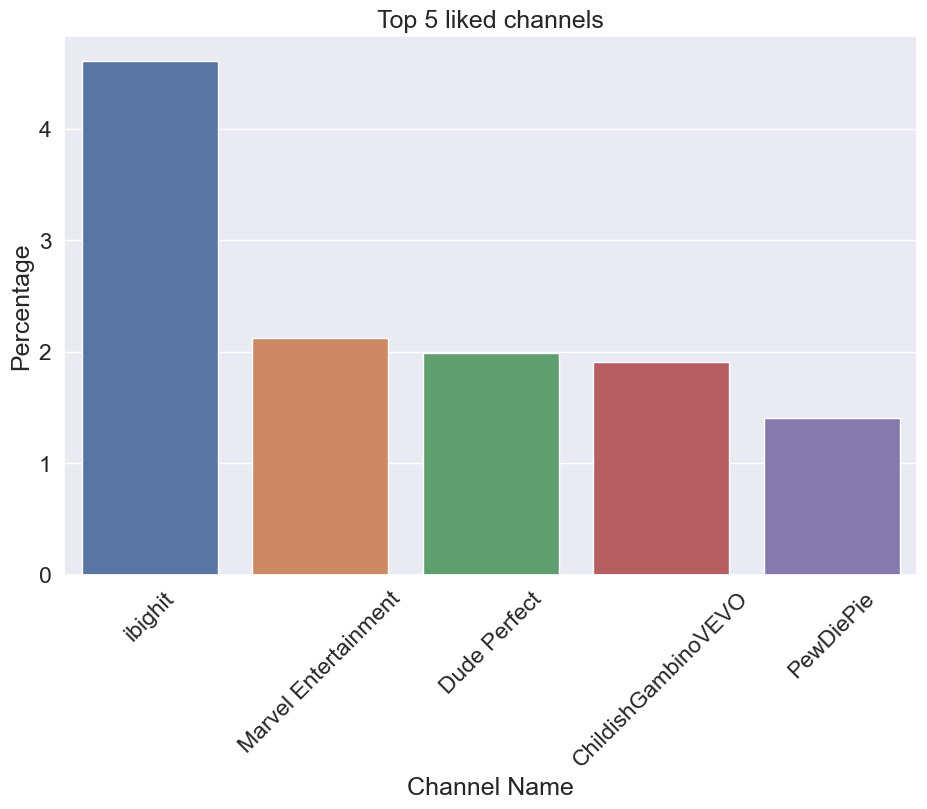

In [ ]:
channel_with_likes = df[["channel_title", "likes"]].groupby("channel_title").sum().sort_values("likes", ascending=False)
channel_with_likes = (channel_with_likes/channel_with_likes.likes.sum()) * 100
fig, ax = pyplot.subplots(figsize=(11, 7))
sns.barplot(x = channel_with_likes.head(5).index, y = channel_with_likes.head(5).likes.values)
plt.xticks(rotation = 45)
plt.xlabel("Channel Name")
plt.ylabel("Percentage")
plt.title("Top 5 liked channels")
plt.show()

**Which Channel get the most dislikes?**

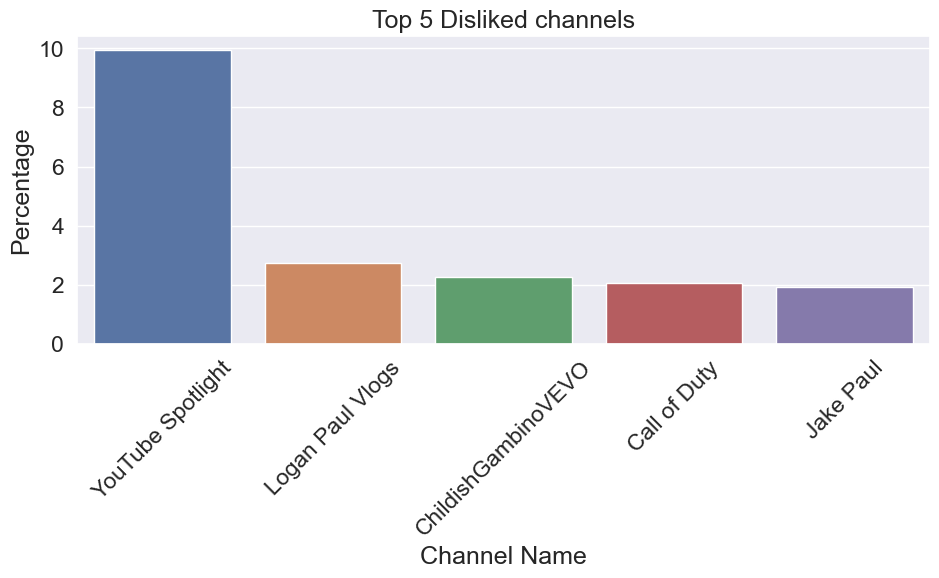

In [ ]:
channel_with_dislikes = df[["channel_title", "dislikes"]].groupby("channel_title").sum().sort_values("dislikes", ascending=False)
channel_with_dislikes = (channel_with_dislikes/channel_with_dislikes.dislikes.sum()) * 100
fig, ax = pyplot.subplots(figsize=(11, 4))
sns.barplot(x = channel_with_dislikes.head(5).index, y = channel_with_dislikes.head(5).dislikes.values)
plt.xticks(rotation = 45)
plt.xlabel("Channel Name")
plt.ylabel("Percentage")
plt.title("Top 5 Disliked channels")
plt.show()

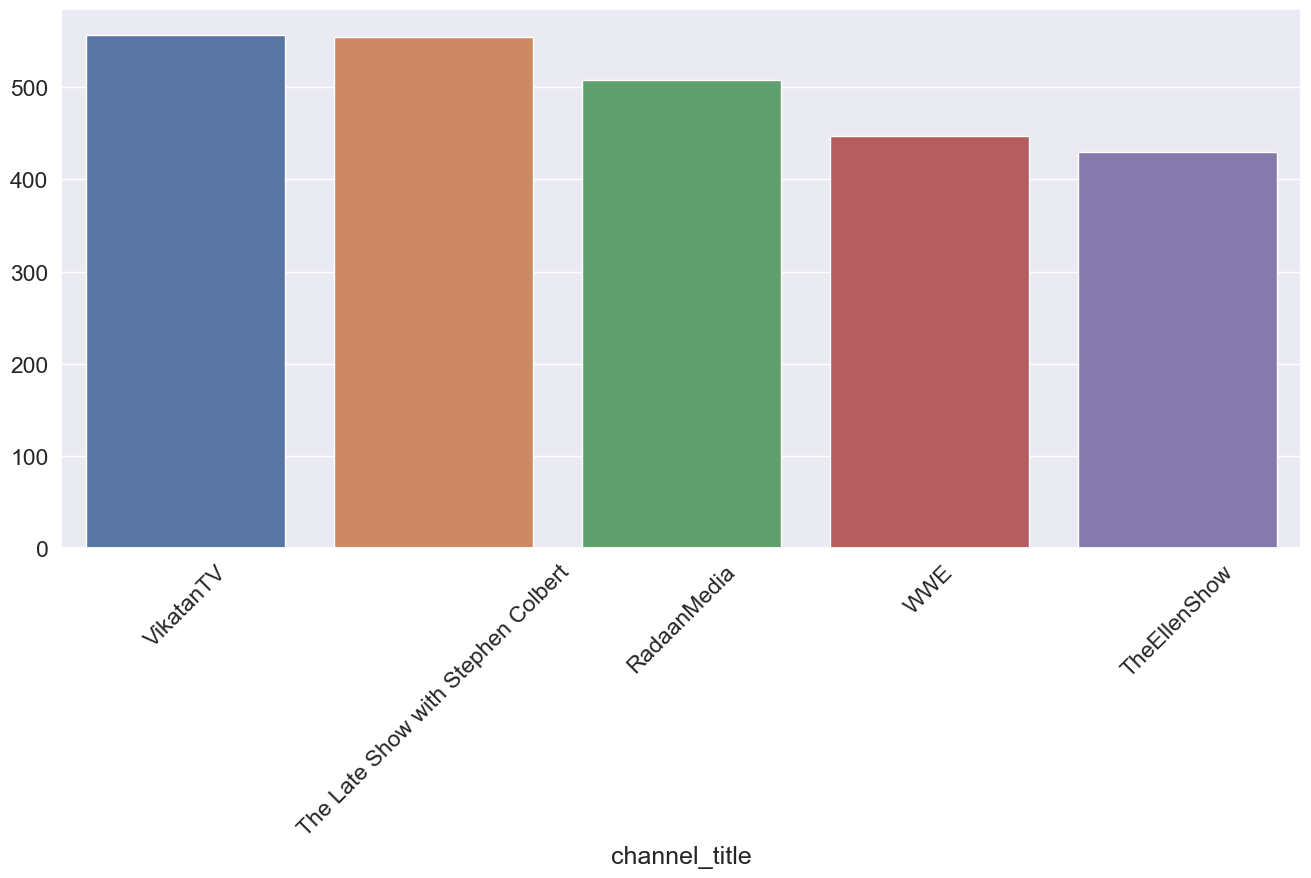

In [ ]:
# Top contributing channels
fig, ax = pyplot.subplots(figsize=(16,7))
top_5_channels = df["channel_title"].value_counts().head(5)
sns.barplot(x = top_5_channels.index, y = top_5_channels.values, ax = ax)
plt.xticks(rotation = 45)
plt.show()


#### 1.2.5: Feature Engineering



##### a. Processing tags

The feature tags in the dataset has a delimiter, use that delimiter to count the number of tags, create a feature called num_tags and add that to the dataset.

In [110]:
num_tags=[]
xdf=combined_data.reset_index(drop=True)
for i in range(len(combined_data)):
  if xdf.at[i,'tags']=='[none]': #some videos has no tags but instead [none], so we are going to consider it as Zero tags.
    count=0
  else:
    count=(xdf.at[i,'tags']).count("|") + 1
  num_tags.append(count)
combined_data['num_tags']=num_tags
combined_data


,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,...,ratings_disabled,video_error_or_removed,description,country,category,likes_log,views_log,dislikes_log,comment_log,num_tags
video_id,,,,,,,,,,,,,,,,,,,,,
kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12 12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,...,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,IN,Film & Animation,10.433145,13.907477,6.683361,6.783325,15
zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13 05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,...,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",IN,News & Politics,6.601230,13.288051,6.807935,0.000000,19
10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12 15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,...,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,IN,Entertainment,7.606885,13.068939,5.497168,5.010635,14
N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12 07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,...,False,False,This video showcases the difference between pe...,IN,Comedy,11.161295,14.032782,7.393263,7.895436,20
kJzGH0PVQHQ,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13 01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,...,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,IN,Entertainment,6.200509,13.047674,5.683580,4.204693,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1PhPYr_9zRY,2018-06-14,BTS Plays With Puppies While Answering Fan Que...,BuzzFeed Celeb,22,2018-05-18 16:39:29,"BuzzFeed|""BuzzFeedVideo""|""Puppy Interview""|""pu...",8259128,645888,4052,62610,...,False,False,"BTS with the PPS, the puppies. These adorable ...",US,People & Blogs,13.378383,15.926830,8.307213,11.044696,27
BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,...,False,False,The Cat Who Caught the Laser - Aaron's Animals,US,Pets & Animals,10.549569,14.337638,7.234177,7.885329,14
D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 17:34:22,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,...,False,False,I had so much fun transforming Safiyas hair in...,US,Entertainment,10.780393,13.879848,6.940222,8.292298,24


##### b. Processing description and title

Calculate the length of description and title and add them as features to the dataset

In [111]:
combined_data["desc_len"]=combined_data["description"].apply(lambda x: len(x))

In [112]:
combined_data["len_title"]=combined_data["title"].apply(lambda x: len(x))

In [113]:
combined_data["overall_len_title_desc"] = combined_data.desc_len + combined_data.len_title


In [114]:
# Print cell
print('check_tags_title_description \n',([combined_data['num_tags'].describe(),combined_data['desc_len'].describe(),combined_data['len_title'].describe()]))

check_tags_title_description 
 [count    154567.000000
mean         18.580551
std          11.929906
min           0.000000
25%           9.000000
50%          17.000000
75%          26.000000
max         124.000000
Name: num_tags, dtype: float64, count    154567.000000
mean        959.949426
std         857.504028
min           1.000000
25%         363.000000
50%         717.000000
75%        1288.000000
max        5260.000000
Name: desc_len, dtype: float64, count    154567.000000
mean         56.408541
std          22.976198
min           2.000000
25%          38.000000
50%          54.000000
75%          74.000000
max         100.000000
Name: len_title, dtype: float64]


##### c. Processing publish_time.


Split 'publish_time' feature into three parts time, date, and weekday, where time will contain the time component of the original feature and date and weekday will store the corresponding date and weekday number respectively. Start with 1 for Monday and end with 7 for Sunday.

In [115]:
date_data=combined_data['publish_time']

In [116]:
combined_data['publish_time'] =date_data.apply(lambda x: pd.to_datetime(x).time())
combined_data['publish_date'] =date_data.apply(lambda x: pd.to_datetime(x).date())

#day on which video was published
combined_data['publish_weekday']=date_data.apply(lambda x: x.dayofweek)+1

import random
random_index = random.randint(0,combined_data.shape[0]-1)


In [117]:
# Print cell
print('check_date_time_processing',([combined_data['publish_time'].iloc[random_index],combined_data['publish_date'].iloc[random_index],sorted(list(combined_data["publish_weekday"].value_counts()))]))

check_date_time_processing [datetime.time(3, 30), datetime.date(2018, 4, 17), [18641, 18931, 22146, 22501, 22523, 23573, 26252]]


##### d. Number of videos per weekday

Calculate the number of videos published per day of the week. Which day of the week do people publish most videos? Make a visualization demonstrating the result.

In [118]:
# plot here

##Creating dataframe after deleting videos which stay trending for more than one day according to the Video ID
dfx=combined_data.reset_index(level=0)[['video_id','publish_weekday']].drop_duplicates(subset = ['video_id'], keep = 'last')

##Mapping the day number : day name
dayOfWeek={1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}
dfx['publish_weekday'] = dfx['publish_weekday'].map(dayOfWeek)

videos_weekday = dfx['publish_weekday'].value_counts().to_frame().reset_index().rename(columns={"publish_weekday": "Week_Days", "count": "No_of_videos"})

(<Axes: title={'center': 'Number of puplished videos per week days '}, xlabel='Week_Days', ylabel='No_of_videos'>,
 Text(0.5, 1.0, 'Number of puplished videos per week days '))

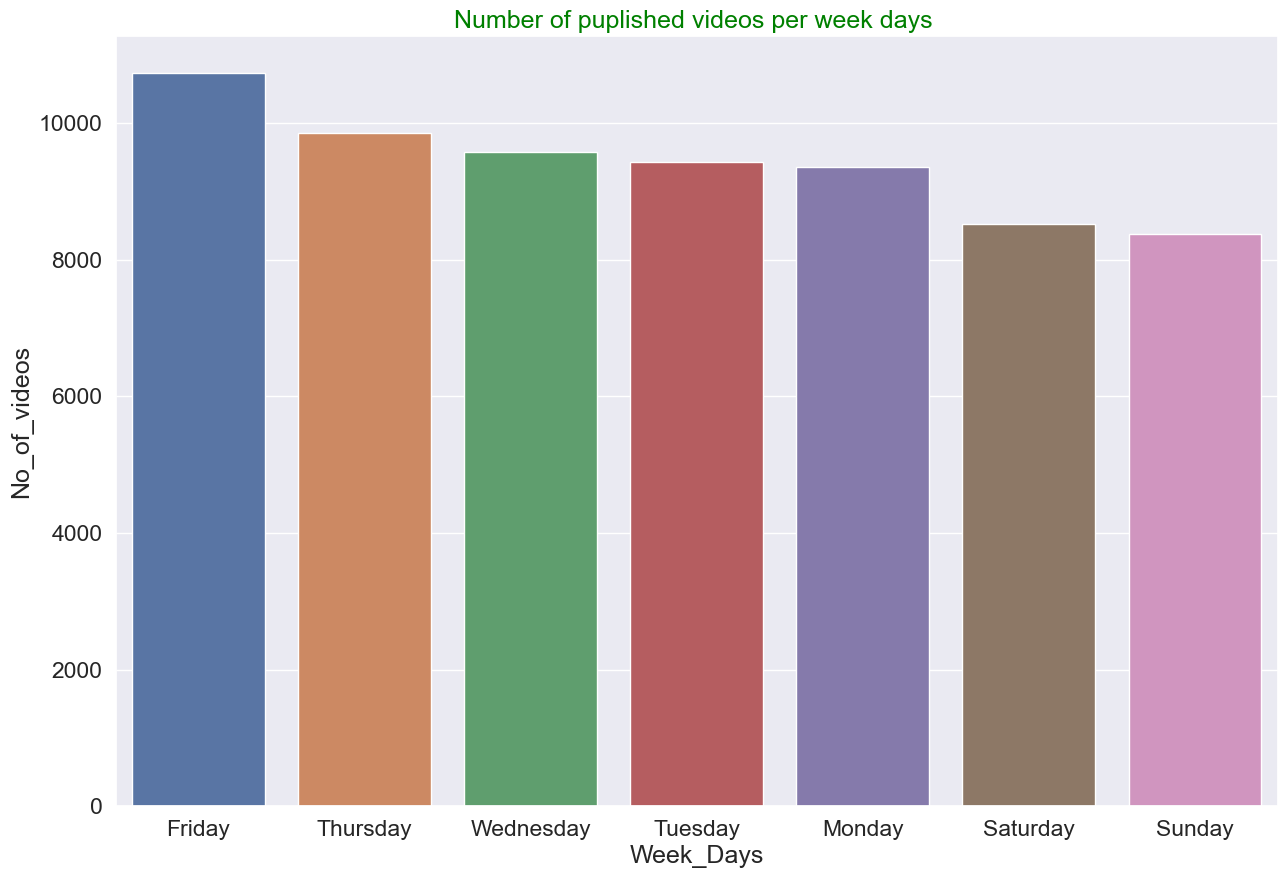

In [119]:
##Calculating and plotting
fig, ax = pyplot.subplots(figsize=(15, 10)),sns.set(font_scale=1.5)
sns.barplot(x="Week_Days", y="No_of_videos", data=videos_weekday,ax=ax),plt.title('Number of puplished videos per week days ',color='Green')
# Plots will be manually graded

#### 1.2.6: Dropping irrelevant non numeric columns

Drop all the columns that are non-numeric as we have processed them and stored the information captured in them in the dataset as numbers.

Note that a few key columns are non-numeric but should be kept in the dataframe:

comments_disabled, ratings_disabled, video_error_or_removed, country

Also drop original views, like, comments and dislikes as you have processed them as logs and stored them as separate feature.

In [120]:
combined_data.columns

Index(['trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category',
       'likes_log', 'views_log', 'dislikes_log', 'comment_log', 'num_tags',
       'desc_len', 'len_title', 'overall_len_title_desc', 'publish_date',
       'publish_weekday'],
      dtype='object')

In [121]:
combined_data.drop(['trending_date', 'title', 'channel_title', 'category_id',
                    'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
                    'thumbnail_link', 'description', 'publish_date'], axis = 1,inplace = True)

In [122]:
combined_data

,comments_disabled,ratings_disabled,video_error_or_removed,country,category,likes_log,views_log,dislikes_log,comment_log,num_tags,desc_len,len_title,overall_len_title_desc,publish_weekday
video_id,,,,,,,,,,,,,,
kzwfHumJyYc,False,False,False,IN,Film & Animation,10.433145,13.907477,6.683361,6.783325,15,920,81,1001,7
zUZ1z7FwLc8,True,False,False,IN,News & Politics,6.601230,13.288051,6.807935,0.000000,19,2232,58,2290,1
10L1hZ9qa58,False,False,False,IN,Entertainment,7.606885,13.068939,5.497168,5.010635,14,482,58,540,7
N1vE8iiEg64,False,False,False,IN,Comedy,11.161295,14.032782,7.393263,7.895436,20,263,30,293,7
kJzGH0PVQHQ,False,False,False,IN,Entertainment,6.200509,13.047674,5.683580,4.204693,11,753,88,841,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1PhPYr_9zRY,False,False,False,US,People & Blogs,13.378383,15.926830,8.307213,11.044696,27,926,52,978,5
BZt0qjTWNhw,False,False,False,US,Pets & Animals,10.549569,14.337638,7.234177,7.885329,14,46,28,74,5
D6Oy4LfoqsU,False,False,False,US,Entertainment,10.780393,13.879848,6.940222,8.292298,24,775,84,859,5


#### 1.2.7: Convert categorical features in the dataset into one hot vectors.

There are three categorical features remaining in the dataset, identify them and convert them into one hot vectors. Be sure that when you one hot encode, the original column is replaced.

In [123]:
combined_data.publish_weekday = combined_data.publish_weekday.astype('category')
combined_data.country = combined_data.country.astype('category')
combined_data.category = combined_data.category.astype('category')
combined_data= pd.get_dummies(combined_data)
# Hint: Use pd.get_dummies()range.

In [124]:
combined_data

,comments_disabled,ratings_disabled,video_error_or_removed,likes_log,views_log,dislikes_log,comment_log,num_tags,desc_len,len_title,...,category_Sports,category_Trailers,category_Travel & Events,publish_weekday_1,publish_weekday_2,publish_weekday_3,publish_weekday_4,publish_weekday_5,publish_weekday_6,publish_weekday_7
video_id,,,,,,,,,,,,,,,,,,,,,
kzwfHumJyYc,False,False,False,10.433145,13.907477,6.683361,6.783325,15,920,81,...,False,False,False,False,False,False,False,False,False,True
zUZ1z7FwLc8,True,False,False,6.601230,13.288051,6.807935,0.000000,19,2232,58,...,False,False,False,True,False,False,False,False,False,False
10L1hZ9qa58,False,False,False,7.606885,13.068939,5.497168,5.010635,14,482,58,...,False,False,False,False,False,False,False,False,False,True
N1vE8iiEg64,False,False,False,11.161295,14.032782,7.393263,7.895436,20,263,30,...,False,False,False,False,False,False,False,False,False,True
kJzGH0PVQHQ,False,False,False,6.200509,13.047674,5.683580,4.204693,11,753,88,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1PhPYr_9zRY,False,False,False,13.378383,15.926830,8.307213,11.044696,27,926,52,...,False,False,False,False,False,False,False,True,False,False
BZt0qjTWNhw,False,False,False,10.549569,14.337638,7.234177,7.885329,14,46,28,...,False,False,False,False,False,False,False,True,False,False
D6Oy4LfoqsU,False,False,False,10.780393,13.879848,6.940222,8.292298,24,775,84,...,False,False,False,False,False,False,False,True,False,False


In [125]:
# Print cell.
print('check_final_df',(combined_data.shape))

check_final_df (154567, 40)


Let's write out the modified data we created to a file so that we can reuse it in Section 2.

In [126]:
combined_data_sec_2 = combined_data.copy()
combined_data_sec_2.rename(columns = {'views_log':'label'}, inplace = True)
combined_data_sec_2.to_csv('combined_data.csv')

#### 1.2.8: Split into x and y

Split the data into features and label, in this case the features are anything but views_log and the label is views_log.

In [127]:
combined_data.columns

Index(['comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'likes_log', 'views_log', 'dislikes_log', 'comment_log', 'num_tags',
       'desc_len', 'len_title', 'overall_len_title_desc', 'country_CA',
       'country_FR', 'country_IN', 'country_US', 'category_Autos & Vehicles',
       'category_Comedy', 'category_Education', 'category_Entertainment',
       'category_Film & Animation', 'category_Gaming',
       'category_Howto & Style', 'category_Movies', 'category_Music',
       'category_News & Politics', 'category_Nonprofits & Activism',
       'category_People & Blogs', 'category_Pets & Animals',
       'category_Science & Technology', 'category_Shows', 'category_Sports',
       'category_Trailers', 'category_Travel & Events', 'publish_weekday_1',
       'publish_weekday_2', 'publish_weekday_3', 'publish_weekday_4',
       'publish_weekday_5', 'publish_weekday_6', 'publish_weekday_7'],
      dtype='object')

In [128]:
combined_data=pd.read_csv('combined_data.csv').set_index('video_id')
label = combined_data['label']
features = combined_data.drop(['label'],axis=1)

In [129]:
combined_data

,comments_disabled,ratings_disabled,video_error_or_removed,likes_log,label,dislikes_log,comment_log,num_tags,desc_len,len_title,...,category_Sports,category_Trailers,category_Travel & Events,publish_weekday_1,publish_weekday_2,publish_weekday_3,publish_weekday_4,publish_weekday_5,publish_weekday_6,publish_weekday_7
video_id,,,,,,,,,,,,,,,,,,,,,
kzwfHumJyYc,False,False,False,10.433145,13.907477,6.683361,6.783325,15,920,81,...,False,False,False,False,False,False,False,False,False,True
zUZ1z7FwLc8,True,False,False,6.601230,13.288051,6.807935,0.000000,19,2232,58,...,False,False,False,True,False,False,False,False,False,False
10L1hZ9qa58,False,False,False,7.606885,13.068939,5.497168,5.010635,14,482,58,...,False,False,False,False,False,False,False,False,False,True
N1vE8iiEg64,False,False,False,11.161295,14.032782,7.393263,7.895436,20,263,30,...,False,False,False,False,False,False,False,False,False,True
kJzGH0PVQHQ,False,False,False,6.200509,13.047674,5.683580,4.204693,11,753,88,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1PhPYr_9zRY,False,False,False,13.378383,15.926830,8.307213,11.044696,27,926,52,...,False,False,False,False,False,False,False,True,False,False
BZt0qjTWNhw,False,False,False,10.549569,14.337638,7.234177,7.885329,14,46,28,...,False,False,False,False,False,False,False,True,False,False
D6Oy4LfoqsU,False,False,False,10.780393,13.879848,6.940222,8.292298,24,775,84,...,False,False,False,False,False,False,False,True,False,False


In [130]:
# print cell
print('check_x_y_split',([features.shape, label.describe()]))

check_x_y_split [(154567, 39), count    154567.000000
mean         12.552680
std           1.816821
min           5.411646
25%          11.469496
50%          12.655328
75%          13.761413
max          19.232552
Name: label, dtype: float64]


## 1.3 : Machine Learning using sklearn

Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

You can find the documentation [here](https://scikit-learn.org/stable/modules/classes.html)

Now we will train some machine learning models using sklearn to predict views, rather than predicting views directly we will predict views_log to avoid numerical instability issues

### 1.3.1 : Split data into train and test

Use sklearn's train_test_split library and split data into train and test sets, the split should be 80-20 meaning 80% for training and rest for testing.


In [131]:
from sklearn.model_selection import train_test_split
# code here
x_train, x_test, y_train, y_test = train_test_split(features.values, label.values, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [132]:
# print cell.
print('check_data_split',[x_train.shape,x_test.shape,y_train.shape,y_test.shape])

check_data_split [(123653, 39), (30914, 39), (123653,), (30914,)]


# Task1 - Training Machine learning mdoel -- C.A. 2

## 1.3.2: Train Machine Learning Models.
    - PCA
    - Random Forest (On PCA dataset with Grid Search CV)
    - Stacking model
    - Random Forest; to pick important feature from whole dataset
    - XGBoost (On PCA dataset)
    - XGBoost (On top 10 features picked by Random Forest)
    - AdaBoost (On PCA dataset)
    - AdaBoost (On top 10 features picked by Random Forest)
    - Grid Search CV (AdaBoost)
    - Grid Search CV (XGBoost)
    - Results

#### 1.3.2.2  Dimensionality reduction with PCA



##### Step 1: Fitting PCA and explained_variance_ratiio
Use Principal component analysis to reduce number of dimensions of the dataset, as a first step fit a pca model on your train set and then plot the explained_variance_ratio against the number of components to decide the number of components you should keep.

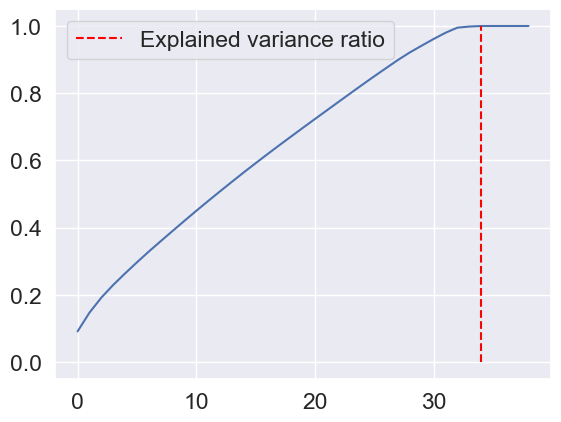

In [138]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# code here

pca = PCA()
sc = StandardScaler()
x_train_std=pca.fit_transform(x_train)
np.set_printoptions(suppress=True)
var_vs_pca = np.cumsum(pca.explained_variance_ratio_)
# print([(i,x) for i, x in enumerate(var_vs_pca)])
# plotting the explained_variance_ratio against the number of components
plt.plot(var_vs_pca)
plt.vlines(34,0, 1, linestyles="dashed", label = "Explained variance ratio", color = "red")
plt.legend()
plt.show()

[(0, 0.09126409194749638), (1, 0.14699700996335624), (2, 0.1917013032821802), (3, 0.2293215438976535), (4, 0.26367107146149255), (5, 0.29668848837140577), (6, 0.3287273605024713), (7, 0.3595029717065902), (8, 0.38990749640497246), (9, 0.4201345651023148), (10, 0.44991901701329623), (11, 0.47910962569042215), (12, 0.5079265573924829), (13, 0.536242037635134), (14, 0.5642886550058703), (15, 0.591574771601573), (16, 0.6186132289523671), (17, 0.6451924007036212), (18, 0.6714127829279525), (19, 0.6973720528077321), (20, 0.7231677030753347), (21, 0.7488305581881112), (22, 0.7744831100241995), (23, 0.8000117398174672), (24, 0.8254065659256438), (25, 0.8503595619447274), (26, 0.8747817722557463), (27, 0.8990337947648571), (28, 0.9214836728973536), (29, 0.9415691727976258), (30, 0.9613202130779526), (31, 0.9798506602673468), (32, 0.9950221994162957), (33, 0.9983391613056003)]


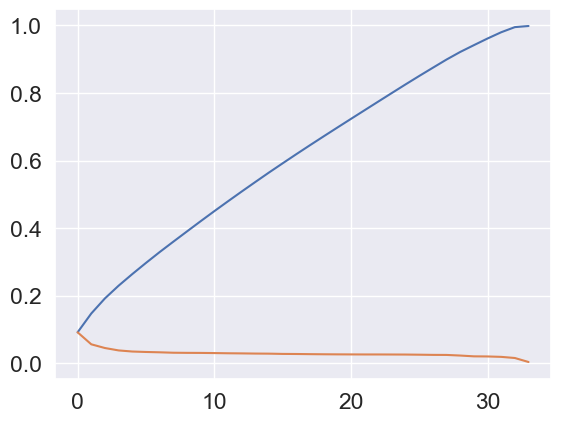

In [139]:
#It is strating faltten with number of component = 34 (99% of variance)
pca = PCA(34)
x_train_std=pca.fit_transform(x_train)
np.set_printoptions(suppress=True)
var_vs_pca = np.cumsum(pca.explained_variance_ratio_)
print([(i,x) for i, x in enumerate(var_vs_pca)])
# plotting the explained_variance_ratio against the number of components
plt.plot(var_vs_pca)
plt.plot(pd.Series(pca.explained_variance_ratio_))

##### Step 2: Deciding number of components to keep
Use the plot to decide the number of components to keep, choose a number that explains atleast 95% of variance in the dataset. Then fit and transform your pca on training set using the number of components you decided.

**Remember that your pca should be trained on the training set (and transformed here) but only transformed on the test set.**

In [140]:
# code here
pca = PCA(n_components=34)
x_train_Trans=pca.fit_transform(x_train)
x_test_Trans=pca.transform(x_test)

In [141]:
# Print cell.
print('check_pca', (x_train_Trans[:50,:]))

check_pca [[ 1.23345231  1.34616323 -0.68053702 ...  0.1906452   0.33334627
   0.35944868]
 [ 1.71575638 -0.08051821 -1.91374054 ... -0.07776555 -0.70968815
  -0.77570453]
 [ 1.36113905  1.28973594 -1.81397901 ...  0.34260858 -0.17670947
  -0.25549642]
 ...
 [-0.41974953 -0.1341514   1.66671784 ...  1.39370159 -1.40067944
  -0.17567999]
 [ 1.52756597 -0.37853089 -0.97792695 ... -0.13571969  0.88779337
   0.66685668]
 [ 1.08848851  0.14520349  0.1638943  ...  0.41925738  0.31297909
  -0.00631595]]


# To record the results

In [142]:
from tabulate import tabulate
from functools import partial
results = {"Algorithm": [], "Train R2 score": [], "Test R2 Score": [],
           "Train MSE": [], "Test MSE": [], "Comments": []}

def update_results(model, x_train = x_train_Trans, y_train = y_train, x_test=  x_test_Trans, y_test = y_test, comment = None):
    global results
    try:
            
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)
        
        train_mse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_mse =  np.sqrt(mean_squared_error(y_test, y_test_pred))     
        
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
    except Exception as err:
        print(err)
    
    
    results["Algorithm"].append(model.__class__.__name__)
    results["Train R2 score"].append(train_r2)
    results["Test R2 Score"].append(test_r2)
    results[ "Train MSE"].append(train_mse)
    results["Test MSE"].append(test_mse)
    results["Comments"].append(comment)
    

    print(tabulate(results, headers = results.keys()))
    
    

### 1.3.2.3 Random Forest.



##### Step 1: Hyperparameter tuning.
Use grid search and train a random forest model on the transformed train dataset. Take a look at the sklearn `RandomForestRegressor` documentation and tune the max_depth hyperparameter using grid search. We have already tested the number of estimators hyperparameter for you. Note this section may take a while to run depending on how large your grid is.

(Hint: refer to the GridSearchCV documentation and do some reading on how the max_depth in a RF model affects the result - while theory may help guide a rough estimate of possible hyperparameters, we can cross validate values using tools like GridSearch.

Our autograder has tiered points for this question depending on your final MSE value but is fairly generous; we are not requiring that you find the **most** optimal value for this hyperparameter but rather demonstrate understanding of grid search optimization.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Only tune the max depth of the trees in the RF hyperparameter.
grid = GridSearchCV(estimator=RandomForestRegressor(), param_grid={'n_estimators':[140, 200],'max_depth':[25,30,35,40,45]},cv=5, refit = True)
grid.fit(x_train_Trans, y_train)
grid.best_params_


In [ ]:
# Best parameters for random forest
depth = [40]
nEstimator = [140]

##### Step 2: Fitting RF
Fit the random forest on the training data using the parameters you computed above. Then make predictions on the test set, report the root mean squared error for the test set.

In [144]:
# Set n_estimators = 140
reg_RF = RandomForestRegressor(n_estimators=140, max_depth=40)
reg_RF.fit(x_train_Trans, y_train)
y_pred_RF = reg_RF.predict(x_test_Trans)

In [145]:
update_results(reg_RF, comment = "Trained on PCA dataset")

Algorithm                Train R2 score    Test R2 Score    Train MSE    Test MSE  Comments
---------------------  ----------------  ---------------  -----------  ----------  ----------------------
RandomForestRegressor          0.990525         0.932338     0.176771    0.473449  Trained on PCA dataset


# For assignment evaluator

In [86]:

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingRegressor



# Define base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=140, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

# Layer 1 model
degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Layer 2 model
meta_model = LinearRegression()

# Create the stacked ensemble model
stacked_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Train the stacked model
stacked_model.fit(x_train_Trans, y_train)



StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(n_estimators=140,
                                                     random_state=42)),
                              ('gb',
                               GradientBoostingRegressor(random_state=42))],
                  final_estimator=LinearRegression())

In [150]:
update_results(stacked_model, comment = "Stacked Regression")

Algorithm                Train R2 score    Test R2 Score    Train MSE    Test MSE  Comments
---------------------  ----------------  ---------------  -----------  ----------  ----------------------
RandomForestRegressor          0.990525         0.932338     0.176771    0.473449  Trained on PCA dataset
StackingRegressor              0.993683         0.933078     0.144336    0.470853  Stacked Regression


# Random Forest to pick the most important features

In [151]:
# Traning algo on whole dataset to find top features
random_importance = RandomForestRegressor(n_estimators= 140 , max_depth= 40)
random_importance.fit(x_train, y_train)

RandomForestRegressor(max_depth=40, n_estimators=140)

In [152]:
# Creating dataframe of feature importance
important_features = pd.DataFrame({"Feature": features.columns,"Importance": random_importance.feature_importances_})
important_features = important_features.sort_values(by = "Importance", ascending=False)

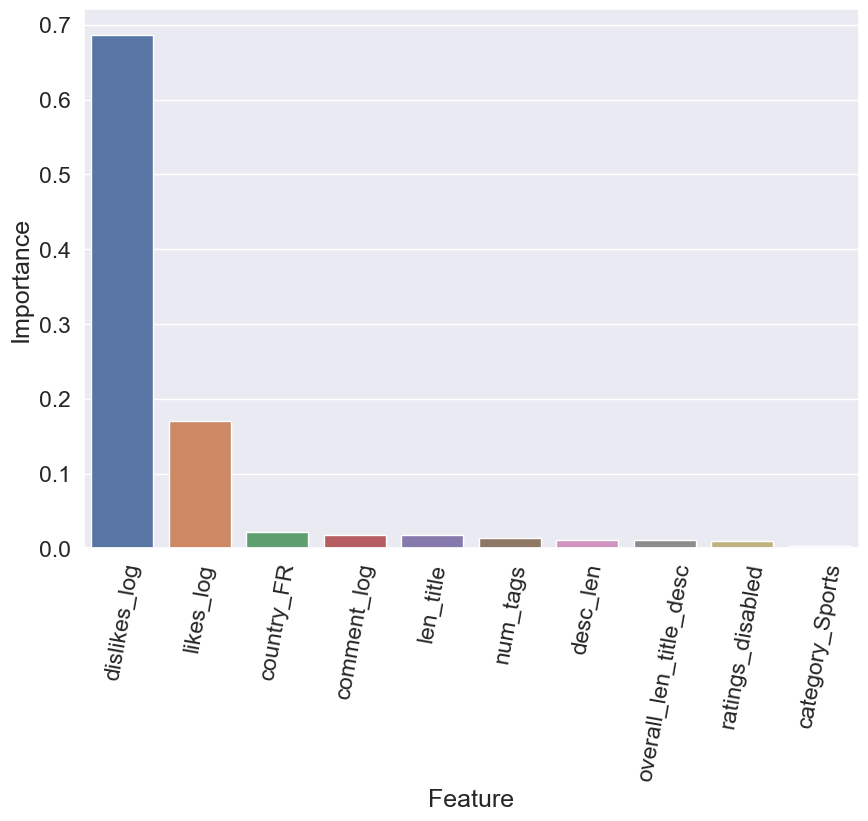

In [157]:
# picking top 10 variables 
important_features_top_10 = important_features.head(10)
fig, ax = pyplot.subplots(figsize=(10, 7))
sns.barplot(x= important_features_top_10.Feature, y = important_features_top_10.Importance)
plt.xticks(rotation = 80)
plt.show()

In [158]:
# Training model on top 10 features 
random_importance_top_f = RandomForestRegressor(n_estimators= 140 , max_depth= 40)
top_10_features = features[important_features_top_10.Feature.to_list()]
top_f_x_train, top_f_x_test, top_f_y_train, top_f_y_test = train_test_split(top_10_features, label.values, test_size=0.2, random_state=0)

# top_f_train
# random_importance.fit(top_10_features, y_train)

In [159]:
top_f_x_test.head()

,dislikes_log,likes_log,country_FR,comment_log,len_title,num_tags,desc_len,overall_len_title_desc,ratings_disabled,category_Sports
video_id,,,,,,,,,,
xi8u9DcC0_Q,6.104793,9.372119,False,7.684324,68,32,1153,1221,False,False
VllA1V5M38E,7.481556,9.846123,False,8.395477,75,33,1264,1339,False,False
_Zow19iWudI,3.044522,8.207129,True,5.365976,31,0,2988,3019,False,False
48qS87hkgkQ,1.945910,6.980076,True,4.744932,77,21,543,620,False,False
FnAx2bLICOo,7.300473,9.409683,False,7.252054,21,11,140,161,False,True


In [160]:
random_importance_top_f.fit(top_f_x_train, top_f_y_train)
update_results(random_importance_top_f, x_train = top_f_x_train, y_train = top_f_y_train, x_test = top_f_x_test,
               y_test = top_f_y_test, comment = "Trained on top 10 features; extracted from random forest")


Algorithm                Train R2 score    Test R2 Score    Train MSE    Test MSE  Comments
---------------------  ----------------  ---------------  -----------  ----------  --------------------------------------------------------
RandomForestRegressor          0.990525         0.932338     0.176771    0.473449  Trained on PCA dataset
StackingRegressor              0.993683         0.933078     0.144336    0.470853  Stacked Regression
RandomForestRegressor          0.989997         0.929716     0.181626    0.482535  Trained on top 10 features; extracted from random forest


# XGBoost (On PCA dataset)

In [161]:
import xgboost as xgb
from sklearn.metrics import r2_score
xgboost_regressor = xgb.XGBRegressor(n_estimators = 300)

params = {
    'n_estimators': 200,
    'objective': 'reg:squarederror',  
    'max_depth': 3,
    'learning_rate': 0.1,
    'eval_metric': 'squareerror'
}


xgboost_regressor.fit(x_train_Trans, y_train)
# y_pred_xgb = xgboost_regressor.predict(x_test_Trans)
update_results(xgboost_regressor, comment="Trained on PCA dataset")

Algorithm                Train R2 score    Test R2 Score    Train MSE    Test MSE  Comments
---------------------  ----------------  ---------------  -----------  ----------  --------------------------------------------------------
RandomForestRegressor          0.990525         0.932338     0.176771    0.473449  Trained on PCA dataset
StackingRegressor              0.993683         0.933078     0.144336    0.470853  Stacked Regression
RandomForestRegressor          0.989997         0.929716     0.181626    0.482535  Trained on top 10 features; extracted from random forest
XGBRegressor                   0.956509         0.925284     0.378713    0.497516  Trained on PCA dataset


In [162]:
xgboost_regressor = xgb.XGBRegressor(n_estimators = 300)
xgboost_regressor.fit(top_f_x_train, top_f_y_train)
update_results(xgboost_regressor, x_train = top_f_x_train, y_train = top_f_y_train, x_test = top_f_x_test,
               y_test = top_f_y_test, comment = "XGBoost Trained on top 10 features; extracted from random forest")


Algorithm                Train R2 score    Test R2 Score    Train MSE    Test MSE  Comments
---------------------  ----------------  ---------------  -----------  ----------  ----------------------------------------------------------------
RandomForestRegressor          0.990525         0.932338     0.176771    0.473449  Trained on PCA dataset
StackingRegressor              0.993683         0.933078     0.144336    0.470853  Stacked Regression
RandomForestRegressor          0.989997         0.929716     0.181626    0.482535  Trained on top 10 features; extracted from random forest
XGBRegressor                   0.956509         0.925284     0.378713    0.497516  Trained on PCA dataset
XGBRegressor                   0.939403         0.916315     0.447031    0.526532  XGBoost Trained on top 10 features; extracted from random forest


# AdaBoost

In [164]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg = AdaBoostRegressor(n_estimators=200)
ada_reg.fit(x_train_Trans, y_train)
update_results(ada_reg, comment="Trained on PCA dataset")


Algorithm                Train R2 score    Test R2 Score    Train MSE    Test MSE  Comments
---------------------  ----------------  ---------------  -----------  ----------  ----------------------------------------------------------------
RandomForestRegressor          0.990525         0.932338     0.176771    0.473449  Trained on PCA dataset
StackingRegressor              0.993683         0.933078     0.144336    0.470853  Stacked Regression
RandomForestRegressor          0.989997         0.929716     0.181626    0.482535  Trained on top 10 features; extracted from random forest
XGBRegressor                   0.956509         0.925284     0.378713    0.497516  Trained on PCA dataset
XGBRegressor                   0.939403         0.916315     0.447031    0.526532  XGBoost Trained on top 10 features; extracted from random forest
AdaBoostRegressor              0.753156         0.751681     0.902244    0.906997  Trained on PCA dataset


In [165]:
ada_reg_top_10 = AdaBoostRegressor(n_estimators=200)
ada_reg_top_10.fit(top_f_x_train, top_f_y_train)
update_results(ada_reg_top_10, x_train = top_f_x_train, y_train = top_f_y_train, x_test = top_f_x_test,
               y_test = top_f_y_test, comment = "AdaBoost Trained on top 10 features; extracted from random forest")

Algorithm                Train R2 score    Test R2 Score    Train MSE    Test MSE  Comments
---------------------  ----------------  ---------------  -----------  ----------  -----------------------------------------------------------------
RandomForestRegressor          0.990525         0.932338     0.176771    0.473449  Trained on PCA dataset
StackingRegressor              0.993683         0.933078     0.144336    0.470853  Stacked Regression
RandomForestRegressor          0.989997         0.929716     0.181626    0.482535  Trained on top 10 features; extracted from random forest
XGBRegressor                   0.956509         0.925284     0.378713    0.497516  Trained on PCA dataset
XGBRegressor                   0.939403         0.916315     0.447031    0.526532  XGBoost Trained on top 10 features; extracted from random forest
AdaBoostRegressor              0.753156         0.751681     0.902244    0.906997  Trained on PCA dataset
AdaBoostRegressor              0.805488         0.8

# Parameter tuning 

From the above model training: XGBoost is performing the best and it is picked 
to tune further to reduce overfitting, where difference between train and test r2 
score is less compared to other algorithms. In addition to tune xgboost, adaboost
will be tuned to measure the increase or decrease in prediction error. 

In [167]:
from sklearn.tree import DecisionTreeRegressor
base_estimator = DecisionTreeRegressor()
adaboost_regressor = AdaBoostRegressor(base_estimator=base_estimator)

# GridSearchCV parameter
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5, 1]
}

grid_search = GridSearchCV(adaboost_regressor, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, refit = True )

# Fit the model
grid_search.fit(top_f_x_train, top_f_y_train)
update_results(grid_search, x_train = top_f_x_train, y_train = top_f_y_train, x_test = top_f_x_test,
               y_test = top_f_y_test, comment = "Using Grid search cv")


Algorithm                 Train R2 score    Test R2 Score    Train MSE    Test MSE  Comments
----------------------  ----------------  ---------------  -----------  ----------  -----------------------------------------------------------------
RandomForestRegressor           0.990525         0.932338    0.176771     0.473449  Trained on PCA dataset
StackingRegressor               0.993683         0.933078    0.144336     0.470853  Stacked Regression
RandomForestRegressor           0.989997         0.929716    0.181626     0.482535  Trained on top 10 features; extracted from random forest
XGBRegressor                    0.956509         0.925284    0.378713     0.497516  Trained on PCA dataset
XGBRegressor                    0.939403         0.916315    0.447031     0.526532  XGBoost Trained on top 10 features; extracted from random forest
AdaBoostRegressor               0.753156         0.751681    0.902244     0.906997  Trained on PCA dataset
AdaBoostRegressor               0.805488   

In [327]:
print(grid_search.best_estimator_)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=0.1,
                  n_estimators=150)


### Hyperparamter tuning for XGBOOST: On top 10 features picked by Random Forest

In [200]:
xgb_regressor = xgb.XGBRegressor()

# Define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01,0.07 , 0.1, 0.5],
    'n_estimators': [100, 150, 200, 350, 300],
    "lambda" : [0,1]
    # "booster": ["gblinear"]
    }

# Create GridSearchCV instance
grid_search_xgboost = GridSearchCV(xgb_regressor, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search_xgboost.fit(top_f_x_train, top_f_y_train)
update_results(grid_search_xgboost, x_train = top_f_x_train, y_train = top_f_y_train, x_test = top_f_x_test,
               y_test = top_f_y_test, comment = "XGBoost Grid search cv on top 10 features")
print(tabulate(results, headers = results.keys()))

Algorithm                 Train R2 score    Test R2 Score    Train MSE    Test MSE  Comments
----------------------  ----------------  ---------------  -----------  ----------  -----------------------------------------------------------------
RandomForestRegressor           0.990525         0.932338    0.176771     0.473449  Trained on PCA dataset
StackingRegressor               0.993683         0.933078    0.144336     0.470853  Stacked Regression
RandomForestRegressor           0.989997         0.929716    0.181626     0.482535  Trained on top 10 features; extracted from random forest
XGBRegressor                    0.956509         0.925284    0.378713     0.497516  Trained on PCA dataset
XGBRegressor                    0.939403         0.916315    0.447031     0.526532  XGBoost Trained on top 10 features; extracted from random forest
AdaBoostRegressor               0.753156         0.751681    0.902244     0.906997  Trained on PCA dataset
AdaBoostRegressor               0.805488   

In [182]:
grid_search_xgboost.best_params_


{'lambda': 1, 'learning_rate': 0.5, 'n_estimators': 200}

In [184]:
grid_search_xgboost.best_params_


{'lambda': 1, 'learning_rate': 0.5, 'n_estimators': 350}

In [202]:
results_frame= pd.DataFrame(results)
results_frame

,Algorithm,Train R2 score,Test R2 Score,Train MSE,Test MSE,Comments
0,RandomForestRegressor,0.990525,0.932338,0.176771,0.473449,Trained on PCA dataset
1,StackingRegressor,0.993683,0.933078,0.144336,0.470853,Stacked Regression
2,RandomForestRegressor,0.989997,0.929716,0.181626,0.482535,Trained on top 10 features; extracted from ran...
3,XGBRegressor,0.956509,0.925284,0.378713,0.497516,Trained on PCA dataset
4,XGBRegressor,0.939403,0.916315,0.447031,0.526532,XGBoost Trained on top 10 features; extracted ...
5,AdaBoostRegressor,0.753156,0.751681,0.902244,0.906997,Trained on PCA dataset
6,AdaBoostRegressor,0.805488,0.805830,0.800914,0.802032,AdaBoost Trained on top 10 features; extracted...
7,GridSearchCV: AdaBoost,0.999881,0.932819,0.019793,0.471763,AdaBoostUsing Grid search cv
8,GridSearchCV,0.939964,0.915568,0.444959,0.528877,XGBoost Grid search cv on top 10 features
9,GridSearchCV,0.954551,0.920975,0.387146,0.511661,XGBoost Grid search cv on top 10 features


In [ ]:
grid_search.fit()

In [204]:
fitted_data = results_frame.drop([0, 4,5, 6, 8], inplace = False)
fitted_data

,Algorithm,Train R2 score,Test R2 Score,Train MSE,Test MSE,Comments
1,StackingRegressor,0.993683,0.933078,0.144336,0.470853,Stacked Regression
2,RandomForestRegressor,0.989997,0.929716,0.181626,0.482535,Trained on top 10 features; extracted from ran...
3,XGBRegressor,0.956509,0.925284,0.378713,0.497516,Trained on PCA dataset
7,GridSearchCV: AdaBoost,0.999881,0.932819,0.019793,0.471763,AdaBoostUsing Grid search cv
9,GridSearchCV,0.954551,0.920975,0.387146,0.511661,XGBoost Grid search cv on top 10 features


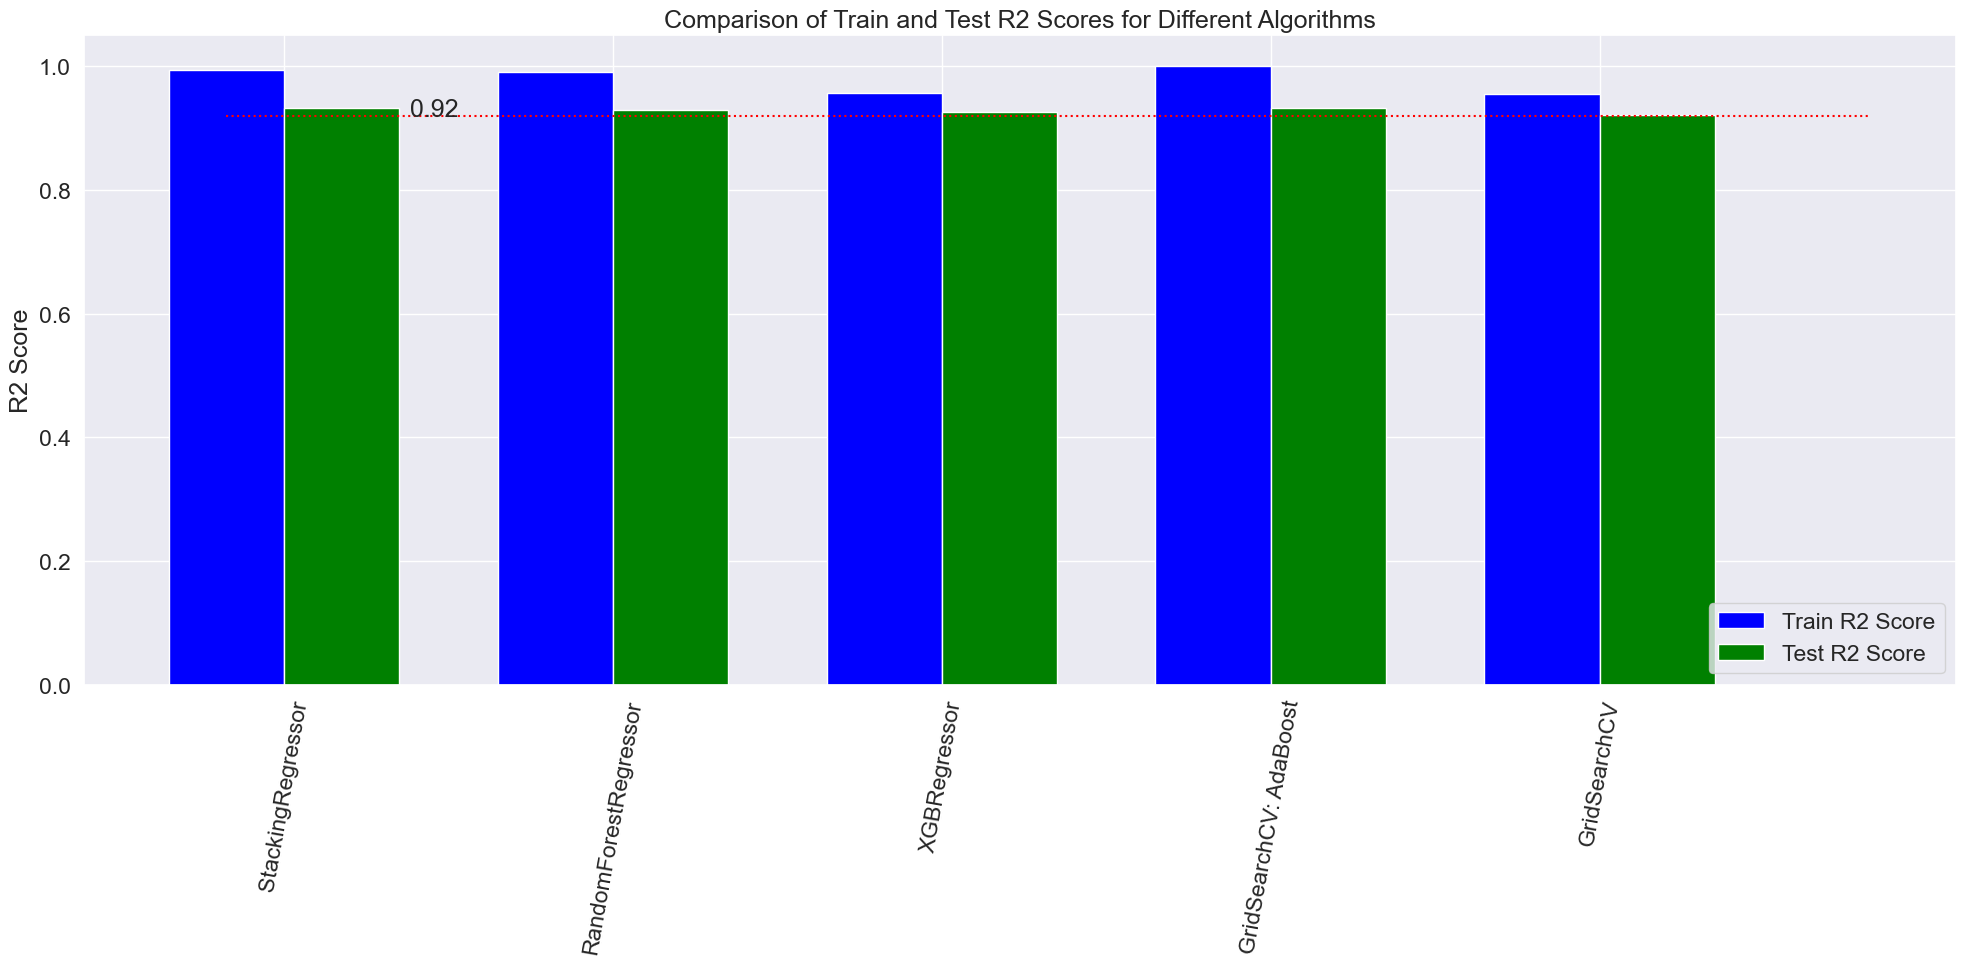

In [210]:

# Plotting
fig, ax = plt.subplots(figsize=(20, 10))

# Grouped bar chart for Train and Test R2 scores
bar_width = 0.35
bar_positions_train = range(len(fitted_data['Algorithm']))
bar_positions_test = [pos + bar_width for pos in bar_positions_train]

ax.bar(bar_positions_train, fitted_data['Train R2 score'], width=bar_width, label='Train R2 Score', color='blue')
ax.bar(bar_positions_test, fitted_data['Test R2 Score'], width=bar_width, label='Test R2 Score', color='green')

ax.set_xticks([pos + bar_width / 2 for pos in bar_positions_train])
ax.set_xticklabels(fitted_data['Algorithm'])
ax.set_ylabel('R2 Score')
ax.set_title('Comparison of Train and Test R2 Scores for Different Algorithms')
ax.legend(loc = "lower right")
plt.xticks(rotation = 80)
plt.hlines(y = 0.92, xmin = 0, xmax = 5, color = "red", linestyles="dotted")
plt.annotate("0.92", [0.56, 0.92])
plt.tight_layout()
plt.show()

# Submission

**Submission on the blackboard**.
** PDF submission for the simalarity check and .ipynb for original submission **

Go to the "File" tab at the top left, and click "Download .ipynb". Submit under 'scalableMachinelearning.ipynb'.

You must submit your notebook to blackboard for the grading.